In [1]:
import pandas as pd
df = pd.read_json('../data/yelp_academic_dataset_business.json', lines=True)

In [2]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [3]:
state = list(df.state.unique())

In [4]:
state.sort()
state

['AB',
 'AZ',
 'CA',
 'CO',
 'DE',
 'FL',
 'HI',
 'ID',
 'IL',
 'IN',
 'LA',
 'MA',
 'MI',
 'MO',
 'MT',
 'NC',
 'NJ',
 'NV',
 'PA',
 'SD',
 'TN',
 'TX',
 'UT',
 'VI',
 'VT',
 'WA',
 'XMS']

In [5]:
att = pd.json_normalize(df['attributes'])
att.columns

Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV',
       'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids',
       'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
       'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

In [6]:
rescol = [col for col in att.columns if col.startswith('Restaurant')]
att_res = att[rescol]

In [7]:
hours = pd.json_normalize(df['hours'])
hours

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
...,...,...,...,...,...,...,...
150341,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-17:30,11:0-17:0
150342,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:0-17:0,0:0-16:0
150343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-17:0,10:0-17:0


In [8]:
hours['opendays_work'] = hours[['Monday','Tuesday','Wednesday','Thursday','Friday']].notna().sum(axis=1)
hours['opendays_weekend'] = hours[['Saturday','Sunday']].notna().sum(axis=1)

In [9]:
o1,c1 = pd.DataFrame(), pd.DataFrame()
for col in hours.columns[0:5]:
    temp = hours[col].str.split('-', expand=True)
    oo = temp[0].str.split(':').str.get(0)#.astype(int)
    cc = temp[1].str.split(':').str.get(0)#.astype(int)
    o1 = pd.concat([o1,oo],axis = 1) #.fillna(0).astype(int)
    c1 = pd.concat([c1,cc],axis = 1) #.fillna(0).astype(int)
o1 = o1.astype('Int64')
hours['open_workday'] = o1.mean(axis = 1, numeric_only=True)
c1 = c1.astype('Int64')
hours['close_workday'] = c1.mean(axis = 1, numeric_only=True)

In [10]:
o2,c2 = pd.DataFrame(), pd.DataFrame()
for col in hours.columns[5:7]:
    temp = hours[col].str.split('-', expand=True)
    oo = temp[0].str.split(':').str.get(0)#.astype(int)
    cc = temp[1].str.split(':').str.get(0)#.astype(int)
    o2 = pd.concat([o2,oo],axis = 1) #.fillna(0).astype(int)
    c2 = pd.concat([c2,cc],axis = 1) #.fillna(0).astype(int)
o2 = o2.astype('Int64')
hours['open_weekend'] = o2.mean(axis = 1, numeric_only=True)
c2 = c2.astype('Int64')
hours['close_weekend'] = c2.mean(axis = 1, numeric_only=True)

In [11]:
businesshours = hours[hours.columns[-6:]]

In [12]:
df = df.drop(['attributes', 'hours'], axis=1)
df = pd.concat([df, att_res ,businesshours], axis=1)

In [13]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsAttire,RestaurantsTableService,RestaurantsGoodForGroups,RestaurantsCounterService,opendays_work,cpendays_weekend,open_workday,close_workday,open_weekend,close_weekend
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,0,0,<NA>,<NA>,<NA>,<NA>
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,5,1,6.4,14.4,8.0,14.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,5,2,8.0,22.2,8.0,22.5
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,5,2,7.0,20.2,7.0,21.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,3,2,14.0,22.0,12.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,5,2,10.0,19.0,10.5,17.0
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,5,2,9.0,17.0,4.5,16.5
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,0,0,<NA>,<NA>,<NA>,<NA>
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,5,2,9.0,20.0,9.5,17.0


In [14]:
cat = pd.DataFrame(df['categories'].str.replace(' ','').str.split(','))
cat['Service'] = [0] * len(cat)
cat['Food'] = [False] * len(cat)
for i in range(len(cat)):
    if cat['categories'][i]:
        cat['Service'][i] = len(cat['categories'][i])
        cat['Food'][i] = True if 'Restaurants' in cat['categories'][i] else False
cat
#cat_food = cat.loc[' Foof' in cat['categories']]

/var/folders/tp/v0n0qm856pj6hmn6dd81rbgw0000gn/T/ipykernel_48738/4161469555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Service'][i] = len(cat['categories'][i])
/var/folders/tp/v0n0qm856pj6hmn6dd81rbgw0000gn/T/ipykernel_48738/4161469555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Food'][i] = True if 'Restaurants' in cat['categories'][i] else False


,categories,Service,Food
0,"[Doctors, TraditionalChineseMedicine, Naturopa...",6,False
1,"[ShippingCenters, LocalServices, Notaries, Mai...",5,False
2,"[DepartmentStores, Shopping, Fashion, Home&Gar...",6,False
3,"[Restaurants, Food, BubbleTea, Coffee&Tea, Bak...",5,True
4,"[Brewpubs, Breweries, Food]",3,False
...,...,...,...
150341,"[NailSalons, Beauty&Spas]",2,False
150342,"[Pets, Nurseries&Gardening, PetStores, HobbySh...",7,False
150343,"[Shopping, Jewelry, Piercing, ToyStores, Beaut...",7,False
150344,"[Fitness/ExerciseEquipment, Eyewear&Opticians,...",5,False


In [15]:
df = df.drop(['categories'], axis=1)
df = pd.concat([df, cat], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   business_id                150346 non-null  object 
 1   name                       150346 non-null  object 
 2   address                    150346 non-null  object 
 3   city                       150346 non-null  object 
 4   state                      150346 non-null  object 
 5   postal_code                150346 non-null  object 
 6   latitude                   150346 non-null  float64
 7   longitude                  150346 non-null  float64
 8   stars                      150346 non-null  float64
 9   review_count               150346 non-null  int64  
 10  is_open                    150346 non-null  int64  
 11  RestaurantsPriceRange2     85314 non-null   object 
 12  RestaurantsTakeOut         59857 non-null   object 
 13  RestaurantsDelivery        56

In [36]:
df_res = df.loc[df['Food'] == True]
df_res_open = df_res[df_res['is_open'] == 1]

In [37]:
df_res_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34987 entries, 3 to 150339
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                34987 non-null  object 
 1   name                       34987 non-null  object 
 2   address                    34987 non-null  object 
 3   city                       34987 non-null  object 
 4   state                      34987 non-null  object 
 5   postal_code                34987 non-null  object 
 6   latitude                   34987 non-null  float64
 7   longitude                  34987 non-null  float64
 8   stars                      34987 non-null  float64
 9   review_count               34987 non-null  int64  
 10  is_open                    34987 non-null  int64  
 11  RestaurantsPriceRange2     28827 non-null  object 
 12  RestaurantsTakeOut         32796 non-null  object 
 13  RestaurantsDelivery        32292 non-null  ob

In [38]:
df_res_open.groupby("RestaurantsCounterService")["RestaurantsCounterService"].count()

RestaurantsCounterService
False     1
True     15
Name: RestaurantsCounterService, dtype: int64

In [39]:
df_res_open.groupby("RestaurantsTableService")["RestaurantsTableService"].count()

RestaurantsTableService
False    5334
None        8
True     9398
Name: RestaurantsTableService, dtype: int64

In [40]:
df_res_open.groupby("RestaurantsAttire")["RestaurantsAttire"].count()

RestaurantsAttire
'casual'     10104
'dressy'       149
'formal'        29
None            30
u'casual'    13817
u'dressy'      276
u'formal'       21
Name: RestaurantsAttire, dtype: int64

In [41]:
df_res_open.groupby("RestaurantsGoodForGroups")["RestaurantsGoodForGroups"].count()

RestaurantsGoodForGroups
False     3927
None        15
True     22451
Name: RestaurantsGoodForGroups, dtype: int64

In [42]:
df_res_open.groupby("RestaurantsReservations")["RestaurantsReservations"].count()

RestaurantsReservations
False    19589
None       142
True      8322
Name: RestaurantsReservations, dtype: int64

In [43]:
df_res_open = df_res_open.drop(['RestaurantsCounterService', 'RestaurantsTableService','RestaurantsAttire',
             'RestaurantsGoodForGroups','RestaurantsReservations'], axis=1)

In [44]:
# Those five columns are not good for prediction but can be good for visualization.

In [45]:
#df_res_open.to_csv('../data/yelp_restaurant.csv',index = False)

In [46]:
df_res_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34987 entries, 3 to 150339
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             34987 non-null  object 
 1   name                    34987 non-null  object 
 2   address                 34987 non-null  object 
 3   city                    34987 non-null  object 
 4   state                   34987 non-null  object 
 5   postal_code             34987 non-null  object 
 6   latitude                34987 non-null  float64
 7   longitude               34987 non-null  float64
 8   stars                   34987 non-null  float64
 9   review_count            34987 non-null  int64  
 10  is_open                 34987 non-null  int64  
 11  RestaurantsPriceRange2  28827 non-null  object 
 12  RestaurantsTakeOut      32796 non-null  object 
 13  RestaurantsDelivery     32292 non-null  object 
 14  opendays_work           34987 non-nul

In [47]:
df_res_open.groupby("RestaurantsPriceRange2")["RestaurantsPriceRange2"].count()

RestaurantsPriceRange2
1       13595
2       14225
3         886
4         113
None        8
Name: RestaurantsPriceRange2, dtype: int64

In [48]:
df_res_open.groupby("RestaurantsTakeOut")["RestaurantsTakeOut"].count()

RestaurantsTakeOut
False     1358
None       861
True     30577
Name: RestaurantsTakeOut, dtype: int64

In [49]:
df_res_open.groupby("RestaurantsDelivery")["RestaurantsDelivery"].count()

RestaurantsDelivery
False     8222
None      1896
True     22174
Name: RestaurantsDelivery, dtype: int64

In [50]:
df_res_open.RestaurantsPriceRange2 = df_res_open.RestaurantsPriceRange2.fillna(0)
df_res_open.RestaurantsTakeOut = df_res_open.RestaurantsTakeOut.fillna(False)
df_res_open.RestaurantsDelivery = df_res_open.RestaurantsDelivery.fillna(False)

df_res_open.RestaurantsPriceRange2 = df_res_open.RestaurantsPriceRange2.replace('None',0)
df_res_open.RestaurantsTakeOut = df_res_open.RestaurantsTakeOut.replace('None',False)
df_res_open.RestaurantsDelivery = df_res_open.RestaurantsDelivery.replace('None',False)

df_res_open.open_workday = df_res_open.open_workday.fillna(0)
df_res_open.close_workday = df_res_open.close_workday.fillna(0)
df_res_open.open_weekend = df_res_open.open_weekend.fillna(24)
df_res_open.close_weekend = df_res_open.close_weekend.fillna(24)

In [51]:
df_res_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34987 entries, 3 to 150339
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             34987 non-null  object 
 1   name                    34987 non-null  object 
 2   address                 34987 non-null  object 
 3   city                    34987 non-null  object 
 4   state                   34987 non-null  object 
 5   postal_code             34987 non-null  object 
 6   latitude                34987 non-null  float64
 7   longitude               34987 non-null  float64
 8   stars                   34987 non-null  float64
 9   review_count            34987 non-null  int64  
 10  is_open                 34987 non-null  int64  
 11  RestaurantsPriceRange2  34987 non-null  object 
 12  RestaurantsTakeOut      34987 non-null  object 
 13  RestaurantsDelivery     34987 non-null  object 
 14  opendays_work           34987 non-nul

In [52]:
df_res_open.to_csv('../data/yelp_restaurant_total.csv',index = False)

In [53]:
df_res_open

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsDelivery,opendays_work,cpendays_weekend,open_workday,close_workday,open_weekend,close_weekend,categories,Service,Food
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,5,2,7.0,20.2,7.0,21.0,"[Restaurants, Food, BubbleTea, Coffee&Tea, Bak...",5,True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,True,5,2,5.4,13.2,8.5,22.0,"[Burgers, FastFood, Sandwiches, Food, IceCream...",6,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,True,5,2,4.8,14.8,6.0,19.0,"[IceCream&FrozenYogurt, FastFood, Burgers, Res...",5,True
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,False,5,2,11.0,14.0,10.0,14.0,"[Vietnamese, Food, Restaurants, FoodTrucks]",4,True
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,True,5,2,6.0,22.0,6.0,22.0,"[American(Traditional), Restaurants, Diners, B...",4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150323,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,...,False,5,2,8.8,18.0,11.0,22.5,"[Bars, Gastropubs, Sandwiches, Nightlife, Rest...",5,True
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,True,5,2,0.0,0.0,0.0,0.0,"[Restaurants, Sandwiches, ConvenienceStores, C...",5,True
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,False,5,2,0.0,3.4,0.0,0.0,"[Cafes, JuiceBars&Smoothies, Coffee&Tea, Resta...",5,True
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,True,4,2,11.0,17.0,11.0,12.0,"[Restaurants, Mexican]",2,True


# Data visualization

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [ ]:
df_res_open = pd.read_csv('../data/yelp_restaurant_total.csv')

In [81]:
df_res_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34987 entries, 3 to 150339
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             34987 non-null  object 
 1   name                    34987 non-null  object 
 2   address                 34987 non-null  object 
 3   city                    34987 non-null  object 
 4   state                   34987 non-null  object 
 5   postal_code             34987 non-null  object 
 6   latitude                34987 non-null  float64
 7   longitude               34987 non-null  float64
 8   stars                   34987 non-null  float64
 9   review_count            34987 non-null  int64  
 10  is_open                 34987 non-null  int64  
 11  RestaurantsPriceRange2  34987 non-null  object 
 12  RestaurantsTakeOut      34987 non-null  object 
 13  RestaurantsDelivery     34987 non-null  object 
 14  opendays_work           34987 non-nul

### Service Time

<AxesSubplot:>

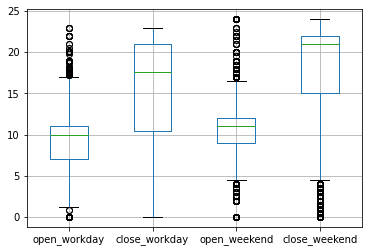

In [76]:
df_res_open[['open_workday','close_workday','open_weekend','close_weekend']].boxplot()

### Service Types

<AxesSubplot:xlabel='Service', ylabel='Count'>

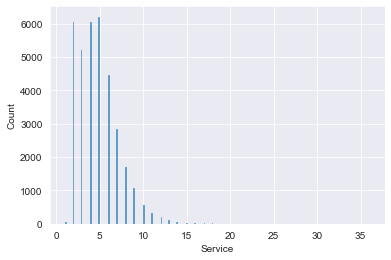

In [82]:
sns.histplot(df_res_open['Service'])

In [87]:
cates = {}
for i in range(len(df_res_open)):
    for cate in df_res_open['categories'].iloc[i]:
        if cate not in cates:
            cates[cate] = 1
        else:
            cates[cate] += 1

In [138]:
df_cates = pd.DataFrame()
df_cates['categories'] = list(cates.keys())
df_cates['counts'] = list(cates.values())
df_cates['percentage'] = df_cates['counts']/sum(df_cates['counts'] )
df_cates = df_cates.sort_values(by = 'counts', ascending=False).reset_index(drop = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

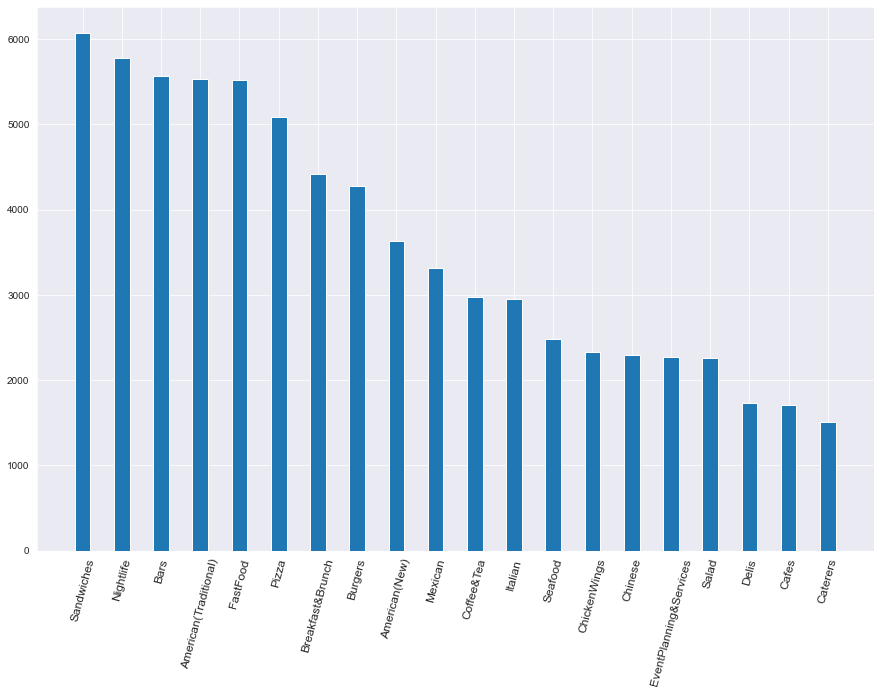

In [144]:
f, ax = plt.subplots(1,1, figsize=(15,10))
plt.bar(df_cates['categories'].iloc[2:22], df_cates['counts'].iloc[2:22],# color ='maroon',
        width = 0.4)
plt.xticks(rotation = 75,fontsize=12)

### Review counts

<BarContainer object of 8 artists>

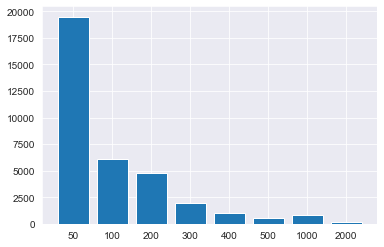

In [177]:
bins = [0,50,100,200,300,400,500,1000,2000]
rcy,rcx = np.histogram(df_res_open['review_count'], bins)
plt.bar(rcx[1:].astype('str'),rcy)

## Zip code

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

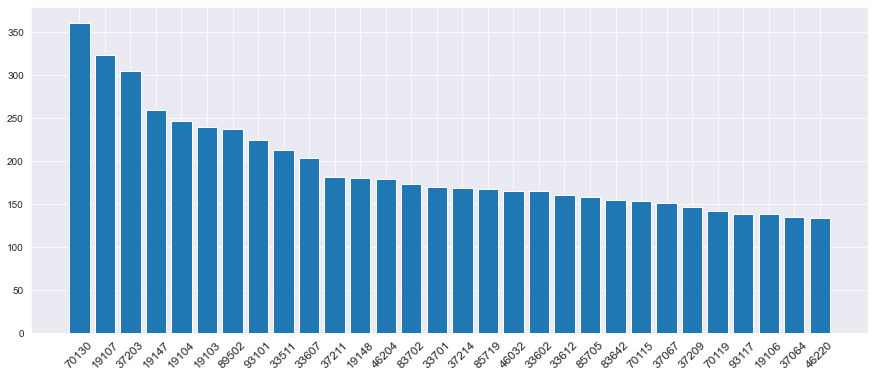

In [189]:
plt.figure(figsize=(15,6))
plt.bar(pd.DataFrame(df_res_open['postal_code'].value_counts()).reset_index()['index'].iloc[:30],
       pd.DataFrame(df_res_open['postal_code'].value_counts()).reset_index()['postal_code'].iloc[:30])
plt.xticks(rotation = 45,fontsize=12)

In [190]:
pd.DataFrame(df_res_open['postal_code'].value_counts()).reset_index()['index'].iloc[:30]

0     70130
1     19107
2     37203
3     19147
4     19104
5     19103
6     89502
7     93101
8     33511
9     33607
10    37211
11    19148
12    46204
13    83702
14    33701
15    37214
16    85719
17    46032
18    33602
19    33612
20    85705
21    83642
22    70115
23    37067
24    37209
25    70119
26    93117
27    19106
28    37064
29    46220
Name: index, dtype: object